<a href="https://colab.research.google.com/github/lauraemmanuella/AprendizadoMaquina/blob/main/11_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


# Mineração de regras de associação

O objetivo da mineração de regras de associação é descobrir relações entre os itens em uma base de dados transacional, ou seja, descobrir conjuntos de itens que frequentemente aparecem na mesma transação

Se os itens A e B são comprados juntos com mais frequência, várias decisões podem ser tomadas para aumentar o lucro, por exemplo:

* A e B podem ser colocados juntos para que, quando um cliente comprar um dos produtos, ele não precise se afastar muito para comprar o outro produto
* As pessoas que compram um dos produtos podem ser direcionadas por meio de publicidades para comprar o outro produto
* Descontos coletivos podem ser oferecidos nesses produtos se o cliente comprar os dois

Existem três conceitos principais para encontrar regras de associação:

* Suporte
* Confiança
* Lift

https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/

## Suporte

Refere-se à popularidade de um item e pode ser calculado localizando o número de transações contendo um item específico dividido pelo número total de transações

Suponha que queremos encontrar suporte para o item B. Isso pode ser calculado como:

> Support(B) = (Transactions containing (B))/(Total Transactions)

Por exemplo, se em 1000 transações, 100 transações contêm Ketchup, então o suporte para o item Ketchup pode ser calculado como:

> Support(Ketchup) = 100/1000 = 10%

## Confiança

A confiança se refere à probabilidade de que um item B também seja comprado se o item A for comprado

Pode ser calculado encontrando o número de transações onde A e B são comprados juntos, dividido pelo número total de transações onde A é comprado

> Confidence(A→B) = (Transactions containing both (A and B)) (Transactions containing A)

Por exemplo, se tivemos 50 transações em que Burger e Ketchup foram comprados juntos. Enquanto em 150 transações, hambúrgueres são comprados

> Confidence(Burger→Ketchup) = 50/150 = 33.3%


## Lift

Lift(A -> B)refere-se ao aumento da relação de venda de B quando A é vendido

O Lift pode ser calculado dividindo a confiança de (A -> B) pelo suporte de (B)

> Lift(A→B) = (Confidence (A→B))/(Support (B))

#Apriori

É um algoritmo de mineração de regras de associação que se baseia no princípio de que qualquer conjunto de itens não frequentes deve ser retirado da busca, evitando percorrer todo o espaço de possibilidades de regras

Em cada nível da busca são gerados os conjuntos de itens possíveis, tendo em conta os conjuntos frequentes no nível anterior

https://medium.com/@fabio.italiano/the-apriori-algorithm-in-python-expanding-thors-fan-base-501950d55be9

https://www.kaggle.com/sangwookchn/association-rule-learning-with-scikit-learn

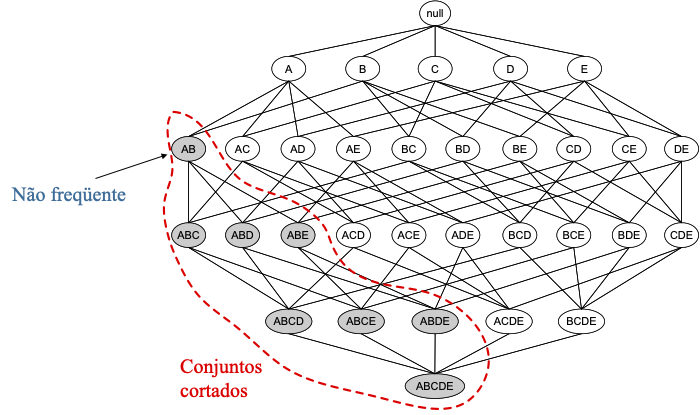

In [29]:
from IPython.display import Image
Image('./img/apriori.png')

In [1]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=2398eee2f3e65cff0b96fc2f5c5358b58c3d5f1928fcb61e8e581fa93a3bba6b
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [2]:
from apyori import apriori

In [11]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('https://raw.githubusercontent.com/lauraemmanuella/AprendizadoMaquina/main/bases/Market_Basket_Optimisation.csv', header = None) #esse dataset não possui cabeçalho


In [12]:
dataset.shape 
#7501 transações, referentes as compras de 1 semana (máximo de 20 itens em cada transação)

(7501, 20)

In [13]:
dataset.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#Transforma o dataframe em uma lista de listas (cada lista é uma transação)
transactions = []
for i in range(0, dataset.shape[0]):
    transactions.append([str(dataset.values[i, j]) for j in range(0, 20)])

print(transactions[1])

['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan']


In [15]:
#remove os nan das listas
for i in range(len(transactions)):
  transactions[i] = [item for item in transactions[i] if str(item) != 'nan']  

print(transactions[1])

['burgers', 'meatballs', 'eggs']


## Executar apriori

**Vamos supor que queremos regras apenas para os itens que são comprados pelo menos 5 vezes por dia**, ou seja, 7 x 5 = 35 vezes em uma semana, já que nosso conjunto de dados é para o período de uma semana

> O suporte para esses itens pode ser calculado como 35/7500 = 0.0045

**A confiança não precisa ser muito alta, porque senão ela só trará regras óbvias**

Dada uma regra A -> B com lift = 3, **o Lift indica que a probabilidade de comprar A e B juntos é 3 vezes maior do que a probabilidade de comprar apenas B.**

O Lift de mais de 1 significa que os produtos A e B têm maior probabilidade de serem comprados juntos

Um Lift de menos de 1 refere-se ao caso em que é improvável que dois produtos sejam comprados juntos

In [26]:
#Podemos tentar várias combinações de hiperparâmetros

rules = apriori(transactions, min_support = 0.0045, min_confidence = 0.2, min_lift = 3, min_length = 2)

In [27]:
association_rules = list(rules) #transforma resultado em uma lista

print(association_rules[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


In [28]:
#Mostra cada regra, com as informações de suporte, confiança e lift
for item in association_rules:
  # first index of the inner list
  # Contains base item and add item
  pair = item[0] 
  items = [x for x in pair]
  print("Rule: " + items[0] + " -> " + items[1])

  #second index of the inner list
  print("Support: " + str(item[1]))

  #third index of the list located at 0th
  #of the third index of the inner list

  print("Confidence: " + str(item[2][0][2]))
  print("Lift: " + str(item[2][0][3]))
  print("=====================================")

Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: mushroom cream sauce -> escalope
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: ground beef -> herb & pepper
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: whole wheat pasta -> olive oil
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: shrimp -> chocolate
Support: 0.005332622317024397
Confidence: 0.23255813953488375
Lift: 3.2545123221103784
Rule: ground beef -> cooking oil
Support: 0.004799360085321957
Confiden